In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df=pd.read_csv("C:/Users/Acer/datasets/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#data exploration
#customer id has no usage
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#'TotalCharges' are in object(should be a float)
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
#to show the blank entries in total charges column
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
#dropping these empty data
df_1=df[df.TotalCharges!=' ']
df_1.shape

(7032, 20)

In [7]:
df_1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#converting TotalCharges to float
df_1.TotalCharges=pd.to_numeric(df_1.TotalCharges)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df_1.TotalCharges.dtypes

dtype('float64')

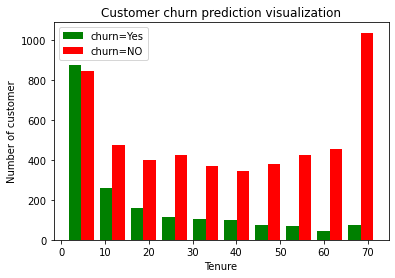

In [10]:
#visualization-1
#checking tenure
tenure_churn_no=df_1[df_1.Churn=='No'].tenure
tenure_churn_yes=df_1[df_1.Churn=='Yes'].tenure
plt.xlabel('Tenure')
plt.ylabel('Number of customer')
plt.title("Customer churn prediction visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=["green",'red'])
plt.legend(["churn=Yes","churn=NO"])

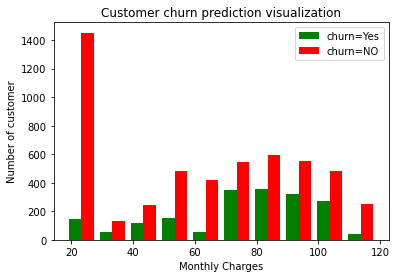

In [11]:
#Visualization-2
#based on montly charges
mc_churn_no=df_1[df_1.Churn=='No'].MonthlyCharges
mc_churn_yes=df_1[df_1.Churn=='Yes'].MonthlyCharges
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customer')
plt.title("Customer churn prediction visualization")
plt.hist([mc_churn_yes,mc_churn_no],color=["green",'red'])
plt.legend(["churn=Yes","churn=NO"])

In [12]:
#to check unique values in every categorical column
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f"{column}:{df[column].unique()}")

In [13]:
#data cleaning
print_unique_col_values(df_1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [14]:
#replacing No___ service to no
df_1.replace('No phone service',"No",inplace=True)
df_1.replace('No internet service',"No",inplace=True)


C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
print_unique_col_values(df_1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [16]:
#yes_no_columns
yes_no_col=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity",
            "OnlineBackup","DeviceProtection","TechSupport","StreamingTV",
            "StreamingMovies","PaperlessBilling","Churn"]

In [17]:
#Replacing yes and no to 1 and 2
for col in yes_no_col:
    df_1[col].replace({"Yes":1,"No":0},inplace=True)


C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
#checking uniqueness
for column in df_1:
            print(f"{column}:{df_1[column].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [19]:
#converting Female and male to  1 and 0
df_1["gender"].replace({"Female":1,"Male":0},inplace=True)
df_1["gender"].unique()

array([1, 0], dtype=int64)

In [20]:
#One Hot Encoding
df_2=pd.get_dummies(data=df_1,columns=["InternetService","Contract","PaymentMethod"])
df_2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [21]:
df_2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3168,1,0,0,0,50,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5291,1,0,1,0,68,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
759,1,0,1,1,72,1,1,1,1,0,...,0,1,0,0,0,1,1,0,0,0
156,1,0,0,0,22,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5870,0,0,1,1,5,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [22]:
df_2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [23]:
#Scaling monthlycharges , Tenure , TotalCharges:
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_2[cols_to_scale]=scaler.fit_transform(df_2[cols_to_scale])

In [24]:
#Checking uniqueness
for column in df_2:
            print(f"{column}:{df_2[column].unique()}")

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [25]:
#STEP 2: splitting the dataset

X=df_2.drop("Churn",axis='columns')
Y=df_2["Churn"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)


In [26]:
x_train.shape


(5625, 26)

In [27]:
x_test.shape

(1407, 26)

In [28]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [29]:
#Neural network
def ANN(X_train,Y_train,X_test,Y_test,loss,weights):
    model= tf.keras.Sequential([
        tf.keras.layers.Dense(26,input_shape=(26,),activation='relu'),
        tf.keras.layers.Dense(15,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid"),
    ])

    model.compile(optimizer="adam",
                  loss=loss,
                  metrics=["accuracy"])
    if weights== -1:
        model.fit(X_train,Y_train,epochs=100)
    else:
        model.fit(X_train,Y_train,epochs=100,class_weights=weights)
    
    print(model.evaluate(X_test,Y_test))
    Y_preds=model.predict(X_test)
    y_preds=np.round(Y_preds)
    print("classification report:\n", classification_report(Y_test,y_preds))
    return y_preds

In [30]:
y_preds=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.4860 - accuracy: 0.7415
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4324 - accuracy: 0.7911
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4235 - accuracy: 0.8009
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4188 - accuracy: 0.8014
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4160 - accuracy: 0.8014
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4130 - accuracy: 0.8073
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4108 - accuracy: 0.8066
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4092 - accuracy: 0.8107
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4085 - accuracy: 0.8096
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4076 - accura

176/176 [==============================] - 1s 5ms/step - loss: 0.3537 - accuracy: 0.8359
Epoch 82/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3550 - accuracy: 0.8325
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8348
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3536 - accuracy: 0.8320
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3513 - accuracy: 0.8354
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3516 - accuracy: 0.8366
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3507 - accuracy: 0.8350
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3506 - accuracy: 0.8384
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3491 - accuracy: 0.8352
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3494 - accuracy: 

In [31]:
#method 1 - Under Sampling
#class count
count_class_0,count_class_1=df_1.Churn.value_counts()
#divide by class
df_class_0=df_2[df_2['Churn']==0]
df_class_1=df_2[df_2['Churn']==1]

In [32]:
df_class_0.shape,df_class_1.shape


((5163, 27), (1869, 27))

In [33]:
count_class_0,count_class_1

(5163, 1869)

In [34]:
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [35]:
print("Random under-sampling:\n" , df_test_under.Churn.value_counts())

Random under-sampling:
 0    1869
1    1869
Name: Churn, dtype: int64


In [36]:
X=df_test_under.drop("Churn",axis='columns')
Y=df_test_under['Churn']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=15,stratify=Y)
#stratify makes sure we have balanced dataset


In [38]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [39]:
y_preds=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6124 - accuracy: 0.6746
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5143 - accuracy: 0.7569
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4929 - accuracy: 0.7629
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4867 - accuracy: 0.7676
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4820 - accuracy: 0.7706
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4792 - accuracy: 0.7749
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.7763
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.7739
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4708 - accuracy: 0.7783
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4698 - accuracy: 0.7799
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.3972 - accuracy: 0.8197
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3956 - accuracy: 0.8234
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.8227
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3943 - accuracy: 0.8191
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.8268
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3926 - accuracy: 0.8177
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3906 - accuracy: 0.8231
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3938 - accuracy: 0.8227
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3913 - accuracy: 0.8264
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.8231
Epoch 93/100


In [40]:
#method 2: Oversampling
count_class_0,count_class_1

(5163, 1869)

In [41]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
print("random over-samplinf:\n", df_test_over.Churn.value_counts())

random over-samplinf:
 0    5163
1    5163
Name: Churn, dtype: int64


In [42]:
X=df_test_over.drop("Churn",axis='columns')
Y=df_test_over['Churn']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=15,stratify=Y)
#stratify makes sure we have balanced dataset


In [44]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [45]:
y_preds=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5621 - accuracy: 0.7015
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4893 - accuracy: 0.7634
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4839 - accuracy: 0.7628
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4794 - accuracy: 0.7657
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4777 - accuracy: 0.7692
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4732 - accuracy: 0.7730
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4707 - accuracy: 0.7747
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4666 - accuracy: 0.7782
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4657 - accuracy: 0.7778
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4619 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3858 - accuracy: 0.8276
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3845 - accuracy: 0.8288
Epoch 83/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3830 - accuracy: 0.8266
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3825 - accuracy: 0.8301
Epoch 85/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3837 - accuracy: 0.8301
Epoch 86/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3819 - accuracy: 0.8314
Epoch 87/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3806 - accuracy: 0.8321
Epoch 88/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3801 - accuracy: 0.8322
Epoch 89/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3799 - accuracy: 0.8318
Epoch 90/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3790 - accuracy: 

In [46]:
#method 3: SMOTE(uses k nearest neighbor)
x=df_2.drop('Churn',axis='columns')
y=df_2['Churn']

In [47]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)
#stratify makes sure we have balanced dataset
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [50]:
y_preds=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5191 - accuracy: 0.7546
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4652 - accuracy: 0.7808
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4577 - accuracy: 0.7851
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4525 - accuracy: 0.7854
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4484 - accuracy: 0.7880
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4437 - accuracy: 0.7904
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4399 - accuracy: 0.7938
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4355 - accuracy: 0.7955
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4324 - accuracy: 0.7983
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4284 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3480 - accuracy: 0.8481
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3474 - accuracy: 0.8479
Epoch 83/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3460 - accuracy: 0.8494
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3491 - accuracy: 0.8481
Epoch 85/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3442 - accuracy: 0.8485
Epoch 86/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3445 - accuracy: 0.8527
Epoch 87/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3440 - accuracy: 0.8484
Epoch 88/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8523
Epoch 89/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3446 - accuracy: 0.8524
Epoch 90/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3406 - accuracy: 

In [51]:
#model 4: Use ensemble with undersampling
x=df_2.drop('Churn',axis='columns')
y=df_2['Churn']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [53]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [54]:
4130/3

1376.6666666666667

In [55]:
df_3=x_train.copy()
df_3['Churn']=y_train

In [56]:
df_3_class0=df_3[df_3.Churn==0]
df_3_class1=df_3[df_3.Churn==1]

In [57]:
df_3_class0.shape,df_3_class1.shape

((4130, 27), (1495, 27))

In [63]:
def get_train_batch(df_majority,df_minority,start,end):
    
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    x_train=df_train.drop("Churn",axis='columns')
    y_train=df_train.Churn
    return x_train,y_train
    

In [64]:
X_train,Y_train=get_train_batch(df_3_class0,df_3_class1,0,1495)
X_train.shape

(2990, 26)

In [65]:
y_pred1=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4929 - accuracy: 0.7428
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4282 - accuracy: 0.7911
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4215 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4166 - accuracy: 0.7973
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4143 - accuracy: 0.8011
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4108 - accuracy: 0.8014
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4093 - accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4079 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4048 - accuracy: 0.8069
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4053 - accura

Epoch 81/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3524 - accuracy: 0.8327
Epoch 82/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3524 - accuracy: 0.8347
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3506 - accuracy: 0.8363
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3502 - accuracy: 0.8368
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3495 - accuracy: 0.8350
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3499 - accuracy: 0.8379
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3488 - accuracy: 0.8340
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3487 - accuracy: 0.8343
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3502 - accuracy: 0.8364
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3472

In [66]:
X_train,Y_train=get_train_batch(df_3_class0,df_3_class1,1495,2990)
y_pred2=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5150 - accuracy: 0.7444
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4276 - accuracy: 0.7913
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4199 - accuracy: 0.8036
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4162 - accuracy: 0.8005
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4142 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.8032
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4120 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4101 - accuracy: 0.8084
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4079 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4068 - accura

176/176 [==============================] - 1s 5ms/step - loss: 0.3532 - accuracy: 0.8350
Epoch 82/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3504 - accuracy: 0.8386
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3508 - accuracy: 0.8393
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3505 - accuracy: 0.8359
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3498 - accuracy: 0.8364
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3494 - accuracy: 0.8379
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3470 - accuracy: 0.8372
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8391
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3482 - accuracy: 0.8370
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3468 - accuracy: 

In [67]:
X_train,Y_train=get_train_batch(df_3_class0,df_3_class1,2990,4130)
y_pred3=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4899 - accuracy: 0.7563
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4320 - accuracy: 0.7868
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.7931
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4203 - accuracy: 0.7964
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4161 - accuracy: 0.7995
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4147 - accuracy: 0.8000
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4117 - accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4097 - accuracy: 0.8023
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4077 - accuracy: 0.8037
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4072 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.3493 - accuracy: 0.8347
Epoch 82/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3496 - accuracy: 0.8375
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3470 - accuracy: 0.8402
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3471 - accuracy: 0.8350
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3467 - accuracy: 0.8366
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3468 - accuracy: 0.8388
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3466 - accuracy: 0.8370
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3459 - accuracy: 0.8393
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3457 - accuracy: 0.8393
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3439 - accuracy: 

In [72]:
y_pred_final= y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0
        

In [73]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

